In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Оценка потенциального экономического эффекта в случае успешной реализации проекта.

Компании принесёт прибыль (в рамках этой программы-акции) продажа пакета услуг, который будет продан тем, кто прошёл тестирование. Для оценки экономического эффекта мы берем в расчет только инкрементальный денежный поток, согласно методологии оценки проектов от Chartered Institute of Management Accountants (CIMA). 

Постоянные расходы (з.п. медицинских работников, з.п. аналитического отдела и т.п.) мы не учитываем в оценке экономического эффекта, т.к. они не являются инкрементальными. Расходы на обепечение прохождения теста пациентами (поддержка сервиса, продвижение и рекламу тестирования в Интернет) взял на себя отдел PR в рамках их проекта узнаваемости бренда сети клиник М., и они не являются инкрементальными для данного проекта.

Для рассчёта экономичекого эффекта используем следующие обозначения:
- $N$ -  количество пациентов, прошедших тестирование, пациенты;
- $AMRU_{high}$(Average Margin per User) - средняя прибыль от 1 пользователя, который по тестированию имеет высокий риск к заболеванию, руб.;
- $AMRU_{low}$(Average Margin per User) - средняя прибыль от 1 пользователя, который по тестированию имеет низкий риск к заболеванию, руб.;
- $\eta$ - вероятность прихода в клинику людей, которым тестирование сообщило о высоком риске к заболеваниюб %;
- $\mu$ - вероятность прихода в клинику людей, которым тестирование сообщило о низком риске к заболеваниюб %;
- $Discount_{high}$ - скидка, предоставляемая пациентам, кому тестирование сообщило о высоком риске к заболеванию, %;
- $Discount_{low}$ - скидка, предоставляемая пациентам, кому тестирование сообщило о низком риске к заболеванию, %;
- $Price_{high}$ - цена за пакет услуг для пациентов, кому тестирование сообщило о высоком риске к заболеванию, руб.;
- $Price_{low}$ - цена за пакет услуг для пациентов, кому тестирование сообщило о низком риске к заболеванию, руб.;
- $Сost_{high}$ - переменные затраты пакета услуг для пациентов, кому тестирование сообщило о высоком риске к заболеванию, руб.;
- $Сost_{low}$ - переменные затраты пакета услуг для пациентов, кому тестирование сообщило о высоком риске к заболеванию, руб.;
- $w$ - доля больных диабетом людей в России, доля;
- $\,TP,\, FP,\, TN,\,FN$ - взяты из матрицы ошибок, пациенты:

**Экономический эффект:**
* $N*[\eta*(\frac{TP*w}{TP+FP}+\frac{FN*(1-w)}{TN+FN})*AMPU_{high}+\mu*(\frac{FP*w}{TP+FP}+\frac{TN*(1-w)}{TN+FN})*AMPU_{low}]$, 

где:
* $AMPU_{high} = Price_{high}*(1-Discount_{high})-(Cost_{high})$,
* $AMPU_{low} = Price_{low}*(1-Discount_{high})-(Cost_{low})$.

Бизнес-кейс построили на следующих предположениях:

In [2]:
N = 1000
eta = 0.4
mu = 0.3
discount_high = 0.60
discount_low = 0.158
price_high = 9160
price_low = 2760
cost_high = 2820
cost_low = 820
w = 0.057

In [3]:
def economic_effect(TP,FP, FN, TN, N = N, eta = eta, mu = mu, discount_high = discount_high, discount_low = discount_low,
                    price_high = price_high, price_low = price_low, cost_high = cost_high, cost_low = cost_low,
                    w = w):#0.057
    AMPU_high = price_high*(1-discount_high)-cost_high
    AMPU_low = price_low*(1-discount_low)-cost_low
    profit_high = N*(eta*(TP*w/(TP+FP)+FN*(1-w)/(TN+FN))) * AMPU_high
    profit_low = N * (mu*(FP*w/(TP+FP)+TN*(1-w)/(TN+FN))) * AMPU_low
    calc = profit_high + profit_low
    return round(calc / 1000, 1)

def recall(TP,FP, FN, TN):
    return(TP/(TP+FN))

def precision(TP,FP, FN, TN):
    return(TP/(TP+FP))

def f_score(TP,FP, FN, TN):
    r = recall(TP,FP, FN, TN)
    p = precision(TP,FP, FN, TN)
    return(2*r*p/(r+p))

In [4]:
print('Таким образом, от внедрения проекта мы ожидаем экономический эффект, равный', economic_effect(39,3,2,19), 'тыс.руб., при f1-score', round(f_score(39,3,2,19),2))
print('Улучшение модели на 1% по расчетам принесет эффект, равный', economic_effect(40,3,1,19), 'тыс.руб., при f1-score', round(f_score(40,3,1,19),2))
print('Идеальная модель по расчетам принесет эффект, равный', economic_effect(41,0,0,22), 'тыс.руб., при f1-score', round(f_score(41,0,0,22),2))

Таким образом, от внедрения проекта мы ожидаем экономический эффект, равный 435.0 тыс.руб., при f1-score 0.94
Улучшение модели на 1% по расчетам принесет эффект, равный 439.8 тыс.руб., при f1-score 0.95
Идеальная модель по расчетам принесет эффект, равный 444.7 тыс.руб., при f1-score 1.0


Построим график зависимости экономического эффекта от F1 для проверки предложенного проекта на устойчивость в зависимости от качества модели при прочих равных - фиксированном значении  $FP + TN$.

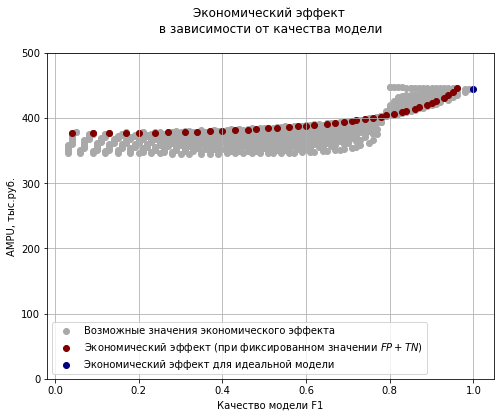

In [5]:
p = []
f1 = []
matrix = []
p_calc = 0.0
f1_calc = 0.0

for i in range(1,22):
    for j in range(1,42):
        p_calc = economic_effect(j,i,41-j,22-i)
        f1_calc = round(f_score(j,i,41-j,22-i),2)
        p.append(p_calc)
        f1.append(f1_calc)
        matrix.append([j,i,41-j,22-i])

p_ideal = economic_effect(41,0,0,22)
f1_ideal = round(f_score(41,0,0,22),2)

p_fixed = [economic_effect(i,3,41-i,19) for i in range(1,42)]
f1_fixed = [round(f_score(i,3,41-i,19),2) for i in range(1,42)]

plt.figure(figsize=(8, 6))
plt.scatter(f1, p, c= "darkgrey", label = "Возможные значения экономического эффекта")
plt.scatter(f1_fixed, p_fixed, c= "maroon", label = "Экономический эффект (при фиксированном значении $FP+TN$)")
plt.scatter(f1_ideal, p_ideal, c= "navy", label = "Экономический эффект для идеальной модели")
plt.legend()
plt.grid()
plt.title("Экономический эффект \n в зависимости от качества модели \n")
plt.xlabel("Качество модели F1")
plt.ylabel("AMPU, тыс.руб.")
# plt.xlim(0.81, 1.01)
plt.ylim(0, 500)
plt.show()

#### Вывод:
* При росте качества модели экономический эффект растет;
* Предложенный проект отвечает финансовым критериям, прогнозируемый результат достаточно устойчив;
* Экономический эффект может быть выше, если удастся повысить конверсию при прохождении тестирования;
* Проект рекомендуется к внедрению.